In [2]:
# for QR codes use inline
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib inline
qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# The Singular Value Decomposition

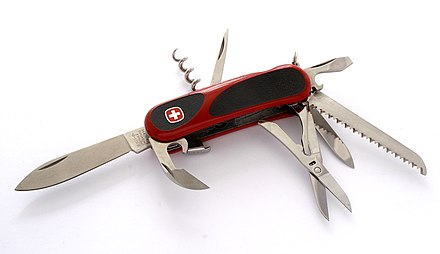

In [3]:
display(Image("images/440px-Wenger_EvoGrip_S17.JPG", width=350))

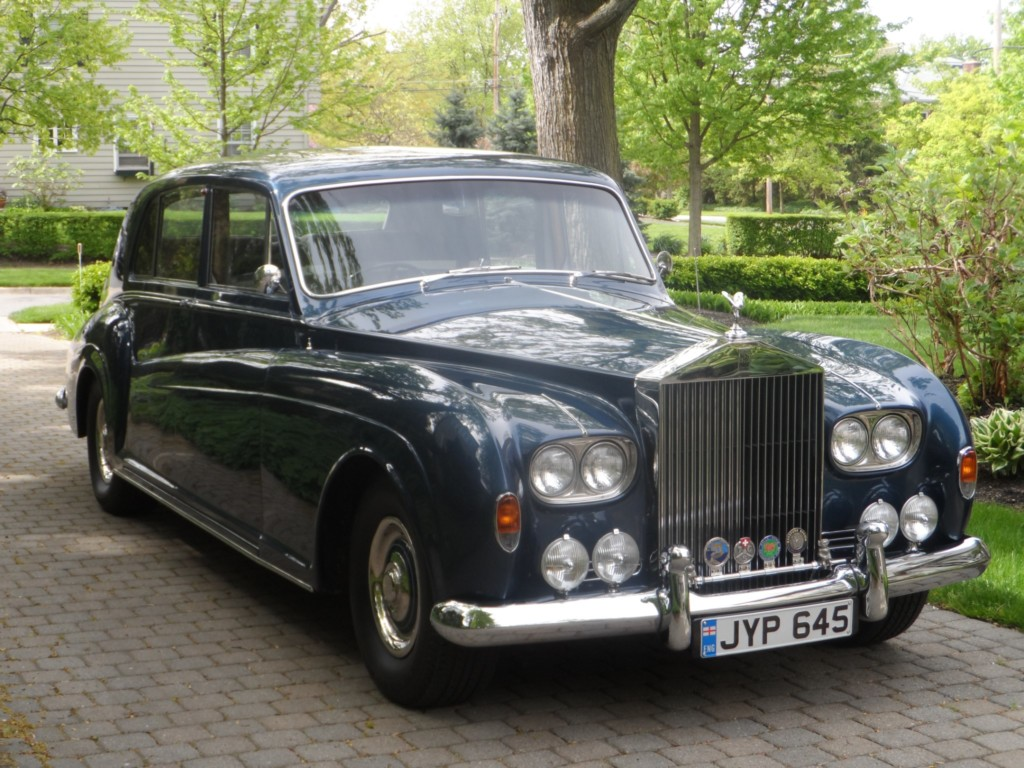

In [4]:
# image source https://bringatrailer.com/listing/1964-rolls-royce-james-young-phanton-v-limosine/
display(Image("images/rolls-royce.jpg", width=350))

Today we will study the most useful decomposition in applied Linear Algebra.

Pretty exciting, eh?

>The Singular Value Decomposition is the __“Swiss Army Knife”__ and the __“Rolls Royce”__ of matrix decompositions.

-- Diane O'Leary

The singular value decomposition is a matrix factorization.  

Now, the first thing to know is that __EVERY__ matrix has a singular value decomposition.

## Maximizing $\Vert A\mathbf{x}\Vert$

The singular value decomposition (let's just call it SVD) is based on a very simple question:


Let's say you are given an arbitrary matrix $A$, which does not need to be square.

Here is the question:

Among all unit vectors, what is the vector $\mathbf{x}$ that maximizes $\Vert A\mathbf{x}\Vert$?

In other words, in which direction does $A$ create the largest output vector from a unit input?

To set the stage to answer this question, let's review a few facts.

You recall that the eigenvalues of a __square__ matrix $A$ measure the amount that $A$ "stretches or shrinks" certain special vectors (the eigenvectors).

For example, for a square $A$, if $A\mathbf{x} = \lambda\mathbf{x}$ and $\Vert \mathbf{x}\Vert = 1,$ then

$$\Vert A\mathbf{x}\Vert = \Vert\lambda\mathbf{x}\Vert = |\lambda|\,\Vert\mathbf{x}\Vert = |\lambda|.$$

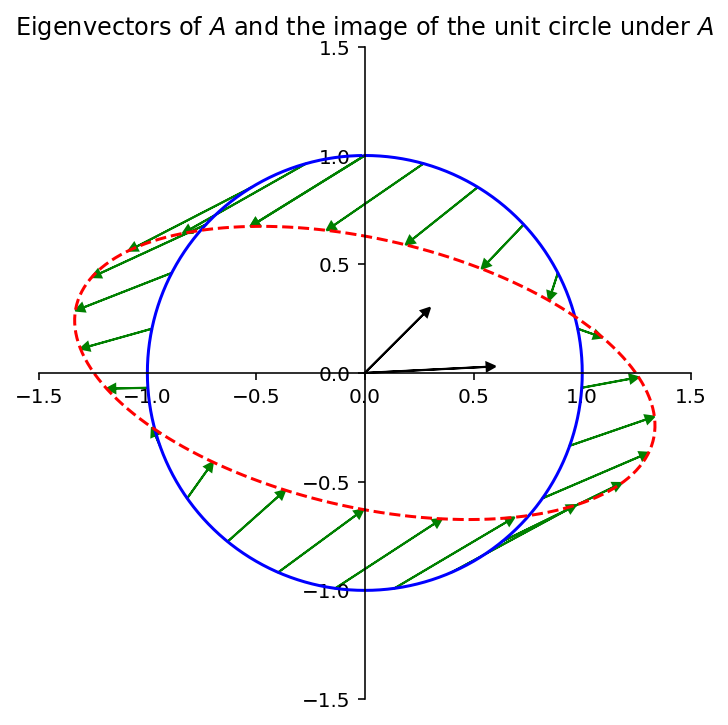

In [16]:
V = np.array([[2,1],[.1,1]])
L = np.array([[1.2,0],
              [0,0.7]])
A = V @ L @ np.linalg.inv(V)
#
ax = dm.plotSetup(-1.5,1.5,-1.5, 1.5, size=(9,6))
ut.centerAxes(ax)
theta = [2 * np.pi * f for f in np.array(range(360))/360.0]
x = [np.array([np.sin(t), np.cos(t)]) for t in theta]
Ax = [A.dot(xv) for xv in x]
ax.plot([xv[0] for xv in x],[xv[1] for xv in x],'-b')
ax.plot([Axv[0] for Axv in Ax],[Axv[1] for Axv in Ax],'--r')
theta_step = np.linspace(0, 2*np.pi, 24)
for th in theta_step:
    x = np.array([np.sin(th), np.cos(th)])
    ut.plotArrowVec(ax, A @ x, x, head_width=.04, head_length=.04, length_includes_head = True, color='g')
u, s, v = np.linalg.svd(A)
ut.plotArrowVec(ax, [0.3* V[0][0], 0.3*V[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [0.3* V[0][1], 0.3*V[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ax.set_title(r'Eigenvectors of $A$ and the image of the unit circle under $A$');

The __largest__ value of $\Vert A\mathbf{x}\Vert$ is the long axis of the ellipse.  Clearly there is some $\mathbf{x}$ that is mapped to that point by $A$.   That $\mathbf{x}$ is what we want to find.

And let's make clear that we can apply this idea to __arbitrary__ (non-square) matrices.

Here is an example that shows that we can still ask the question of what unit $\mathbf{x}$ maximizes $\Vert A\mathbf{x}\Vert$ even when $A$ is not square.

For example:

If $A = \begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix},$ 

then the linear transformation $\mathbf{x} \mapsto A\mathbf{x}$ maps the unit sphere $\{\mathbf{x} : \Vert \mathbf{x} \Vert = 1\}$ in $\mathbb{R}^3$ onto an ellipse in $\mathbb{R}^2$, as shown here:

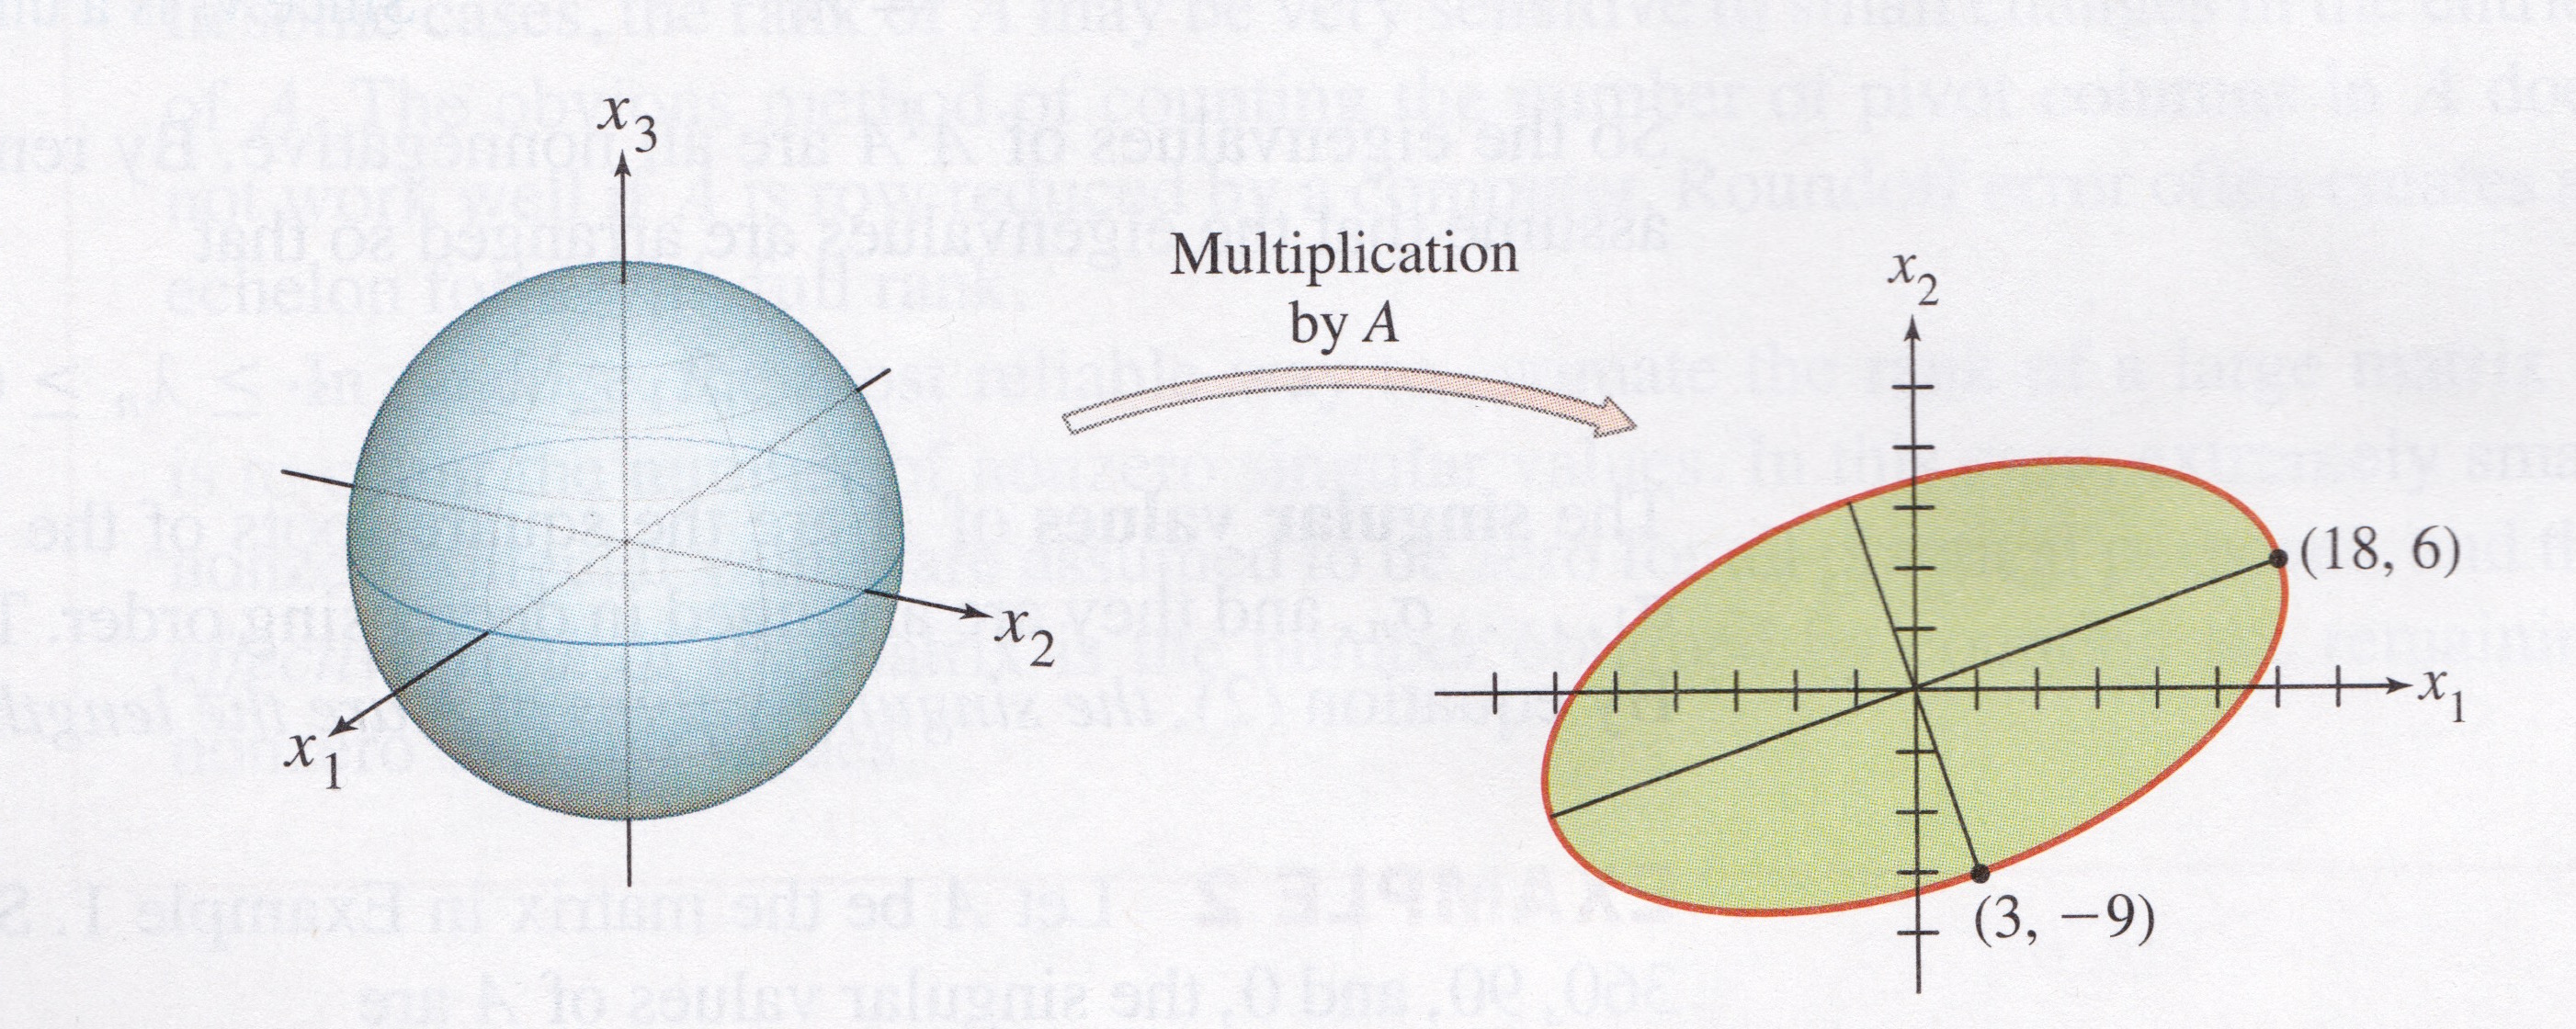

In [17]:
display(Image("images/Lay-fig-7-4-1.jpg", width=650))

### $\Vert A\mathbf{x}\Vert^2$ is a Quadratic Form

Now, here is a way to answer our question:

__Problem.__ Find the unit vector $\mathbf{x}$ at which the length $\Vert A\mathbf{x}\Vert$ is maximized, and compute this maximum length.

__Solution.__

The quantity $\Vert A\mathbf{x}\Vert^2$ is maximized at the same $\mathbf{x}$ that maximizes $\Vert A\mathbf{x}\Vert$, and $\Vert A\mathbf{x}\Vert^2$ is easier to study.

So let's ask to find the unit vector $\mathbf{x}$ at which $\Vert A\mathbf{x}\Vert^2$ is maximized.

Observe that

$$ \Vert A\mathbf{x}\Vert^2 = (A\mathbf{x})^T(A\mathbf{x}) $$

$$ = \mathbf{x}^TA^TA\mathbf{x} $$

$$ = \mathbf{x}^T(A^TA)\mathbf{x} $$

Now, $A^TA$ is a symmetric matrix.  

So we see that $\Vert A\mathbf{x}\Vert^2 = \mathbf{x}^TA^TA\mathbf{x}$ is a quadratic form!

... and we are seeking to maximize it subject to the constraint $\Vert \mathbf{x}\Vert = 1$.

As we learned in the last lecture, the maximum value of a quadratic form, subject to the constraint that $\Vert\mathbf{x}\Vert = 1$, is the largest eigenvalue of the symmetric matrix.

So the maximum value of $\Vert A\mathbf{x}\Vert^2$ subject to $\Vert\mathbf{x}\Vert = 1$ is $\lambda_1$, the largest eigenvalue of $A^TA$.

Also, the maximum is attained at a unit eigenvector of $A^TA$ corresponding to $\lambda_1$.

For the matrix $A$ in the 2 $\times$ 3 example,

$$A^TA = \begin{bmatrix}4&8\\11&7\\14&-2\end{bmatrix} \,\begin{bmatrix}4&11&14\\8&7&-2\end{bmatrix} = \begin{bmatrix}80&100&40\\100&170&140\\40&140&200\end{bmatrix}.$$

The eigenvalues of $A^TA$ are $\lambda_1 = 360, \lambda_2 = 90,$ and $\lambda_3 = 0.$   

The corresponding unit eigenvectors are, respectively, 

$$\mathbf{v}_1 = \begin{bmatrix}1/3\\2/3\\2/3\end{bmatrix}, \mathbf{v}_2 = \begin{bmatrix}-2/3\\-1/3\\2/3\end{bmatrix}, \mathbf{v}_3 = \begin{bmatrix}2/3\\-2/3\\1/3\end{bmatrix}.  $$

For $\Vert\mathbf{x}\Vert = 1$, the maximum value of $\Vert A\mathbf{x}\Vert$ is $\Vert A\mathbf{v}_1\Vert = \sqrt{360}.$

This example shows that the key to understanding the effect of $A$ on the unit sphere in $\mathbb{R}^3$ is to examime the quadratic form $\mathbf{x}^T(A^TA)\mathbf{x}.$  

We can also go back to our 2 $\times$ 2 example.

Let's plot the eigenvectors of $A^TA$.  

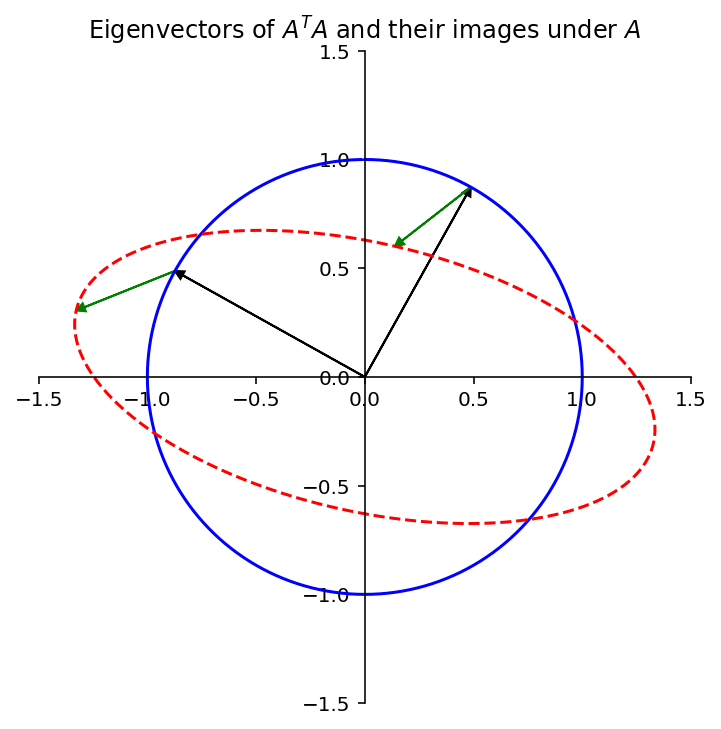

In [18]:
ax = dm.plotSetup(-1.5,1.5,-1.5, 1.5, size=(9,6))
ut.centerAxes(ax)
theta = [2 * np.pi * f for f in np.array(range(360))/360.0]
x = [np.array([np.sin(t), np.cos(t)]) for t in theta]
Ax = [A.dot(xv) for xv in x]
ax.plot([xv[0] for xv in x],[xv[1] for xv in x],'-b')
ax.plot([Axv[0] for Axv in Ax],[Axv[1] for Axv in Ax],'--r')
theta_step = np.linspace(0, 2*np.pi, 24)
#for th in theta_step:
#    x = np.array([np.sin(th), np.cos(th)])
#    ut.plotArrowVec(ax, A @ x, x, head_width=.04, head_length=.04, length_includes_head = True, color='g')
u, s, v = np.linalg.svd(A)
ut.plotArrowVec(ax, [v[0][0], v[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [v[0][1], v[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='Black')
ut.plotArrowVec(ax, [s[0]*u[0][0], s[0]*u[1][0]], [v[0][0], v[1][0]], head_width=.04, head_length=.04, length_includes_head = True, color='g')
ut.plotArrowVec(ax, [s[1]*u[0][1], s[1]*u[1][1]], [v[0][1], v[1][1]], head_width=.04, head_length=.04, length_includes_head = True, color='g')
ax.set_title(r'Eigenvectors of $A^TA$ and their images under $A$');

We see that the eigenvector corresponding to the largest eigenvalue of $A^TA$ indeed shows us where $\Vert A\mathbf{x}\Vert$ is maximized -- where the ellipse is longest.

Also, the other eigenvector of $A^TA$ shows us where the ellipse is narrowest.

In fact, the entire geometric behavior of the transformation $\mathbf{x}\mapsto A\mathbf{x}$ is captured by the quadratic form $\mathbf{x}^TA^TA\mathbf{x}$.

## The Singular Values of a Matrix

Let's continue to consider $A$ to be an arbitrary $m\times n$ matrix. 

Notice that even though $A$ is not square in general, $A^TA$ is square and __symmetric.__

So, there is a lot we can say about $A^TA$.  

In particular, since $A^TA$ is symmetric, it can be __orthogonally diagonalized__ (as we saw in the last lecture).

So let $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ be an orthonormal basis for $\mathbb{R}^n$ consisting of eigenvectors of $A^TA$, and let $\lambda_1, \dots, \lambda_n$ be the corresponding eigenvalues of $A^TA$.  

Then, for any eigenvector $\mathbf{v}_i$, 

$$ \Vert A\mathbf{v}_i\Vert^2 = (A\mathbf{v}_i)^T A\mathbf{v}_i = \mathbf{v}_i^T A^TA\mathbf{v}_i $$

$$ = \mathbf{v}_i^T(\lambda_i)\mathbf{v}_i $$
(since $\mathbf{v}_i$ is an eigenvector of $A^TA$)

$$ = \lambda_i$$
(since $\mathbf{v}_i$ is a unit vector.)

Now any expression $\Vert\cdot\Vert^2$ is nonnegative.

So the eigenvalues of $A^TA$ are all nonnegative.

That is: $A^TA$ is __positive semidefinite.__

We can therefore renumber the eigenvalues so that

$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0.$$

__Definition.__ The __singular values__ of $A$ are the square roots of the eigenvalues of $A^TA$.  They are denoted by $\sigma_1,\dots,\sigma_n,$ and they are arranged in decreasing order.

That is, $\sigma_i = \sqrt{\lambda_i}$ for $i = 1,\dots,n.$

By the above argument, __the singular values of $A$ are the lengths of the vectors $A\mathbf{v}_1, \dots, A\mathbf{v}_n.$__

Where $\mathbf{v}_1, \dots, \mathbf{v}_n.$ are the eigenvectors of $A^TA$, normalized to unit length.

### The Eigenvectors of $A^TA$ Form an Orthogonal Basis for $\operatorname{Col} A$

Now: we know that vectors $\mathbf{v}_1, \dots, \mathbf{v}_n$ are an orthogonal set because they are eigenvectors of the symmetric matrix $A^TA$.  

However, it's __also__ the case that $A\mathbf{v}_1, \dots, A\mathbf{v}_n$ are an orthogonal set.

This fact is key to the SVD.

This fact is not obvious at first!

But it is true -- let's prove it (and a bit more).

__Theorem.__ Suppose $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ is an orthonormal basis of $\mathbb{R}^n$ consisting of eigenvectors of $A^TA$, arranged so that the corresponding eigenvalues of $A^TA$ satisfy $\lambda_1 \geq \cdots \geq \lambda_n,$ and suppose $A$ has $r$ nonzero singular values.  

Then $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal basis for $\operatorname{Col} A,$ and rank $A = r$. 

Note how surprising this is: while $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ are a basis for $\mathbb{R}^n$, $\operatorname{Col} A$ is a subspace of $\mathbb{R}^m$.

Nonetheless, 
* two eigenvectors $\mathbf{v}_i$ and $\mathbf{v}_j \in \mathbb{R}^n$ are orthogonal, and
* __their images__ $A\mathbf{v}_i$ and $A\mathbf{v}_j \in \mathbb{R}^m$ are also orthogonal.

__Proof.__   What we need to do is establish that $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal linearly independent set whose span is $\operatorname{Col}\ A$.


Because $\mathbf{v}_i$ and $\mathbf{v}_j$ are orthogonal for $i\neq j$,

$$ (A\mathbf{v}_i)^T(A\mathbf{v}_j) = \mathbf{v}_i^TA^TA\mathbf{v}_j = \mathbf{v}_i^T(\lambda_j \mathbf{v}_j) = 0.$$

So $\{A\mathbf{v}_1, \dots, A\mathbf{v}_n\}$ is an __orthogonal__ set.

Furthermore, since the lengths of the vectors $A\mathbf{v}_1, \dots, A\mathbf{v}_n$ are the singular values of $A$, and since there are $r$ nonzero singular values, $A\mathbf{v}_i \neq {\mathbf 0}$ if and only if $1 \leq i \leq r.$

So $A\mathbf{v}_1, \dots, A\mathbf{v}_r$ are a __linearly independent__ set (because they are orthogonal and all nonzero), and clearly they are each in $\operatorname{Col}\ A$.

Finally, we just need to show that $\operatorname{Span}\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\} = \operatorname{Col} A$. 

To do this we'll show that for any $\mathbf{y}$ in $\operatorname{Col}\ A$, we can write $\mathbf{y}$ in terms of $\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$:

Say $\mathbf{y} = A\mathbf{x}.$

Because $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ is a basis for $\mathbb{R}^n$, we can write $\mathbf{x} = c_1\mathbf{v}_1 + \dots + c_n\mathbf{v}_n,$ so

$$\mathbf{y} = A\mathbf{x} = c_1A\mathbf{v}_1 + \dots + c_rA\mathbf{v}_r + \dots + c_nA\mathbf{v}_n.$$

$$ = c_1A\mathbf{v}_1 + \dots + c_rA\mathbf{v}_r. $$
(because $A\mathbf{v}_i = {\mathbf 0}$ for $i > r$).

In summary: $\{A\mathbf{v}_1, \dots, A\mathbf{v}_n\}$ is an (orthogonal) linearly independent set whose span is $\operatorname{Col} A$, so it is an (orthogonal) basis for $\operatorname{Col}A$.

Notice that we have also proved that rank $A = \dim\operatorname{Col}\ A = r.$

In other words, if $A$ has $r$ nonzero singular values, $A$ has rank $r$.

## The Singular Value Decomposition

What we have just proved is that the eigenvectors of $A^TA$ are rather special.

Note that, thinking of $A$ as a linear operator:
* its domain is $\mathbb{R}^n$, and 
* its range is $\operatorname{Col}A.$

So we have just proved that 
* the set $\{\mathbf{v}_i\}$ is an orthogonal basis for the domain of $A$, and 
* the set $\{A\mathbf{v}_i\}$ is an orthogonal basis for the range of $A$.

Now we can define the SVD.

__Theorem.__ Let $A$ be an $m\times n$ matrix with rank $r$.  Then there exists an $m\times n$ matrix $\Sigma$ whose diagonal entries are the first $r$ singular values of $A$, $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0,$ and there exists an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal matrix $V$ such that 

$$ A = U\Sigma V^T $$

Any factorization $A = U\Sigma V^T,$ with $U$ and $V$ orthogonal and $\Sigma$ a diagonal matrix is called a __singular value decomposition (SVD)__ of $A$.  

The columns of $U$ are called the __left singular vectors__ and the columns of $V$ are called the __right singular vectors__ of $A$.

__Aside__: regarding the "Rolls Royce" property, consider how elegant this structure is.

In particular:

* $A$ is an arbitrary matrix
* $U$ and $V$ are both __orthogonal__ matrices
* $\Sigma$ is a __diagonal__ matrix
* all singular values are __positive or zero__
* there are as many __positive__ singular values as the rank of $A$
    * (not part of the theorem but we'll see it is true)


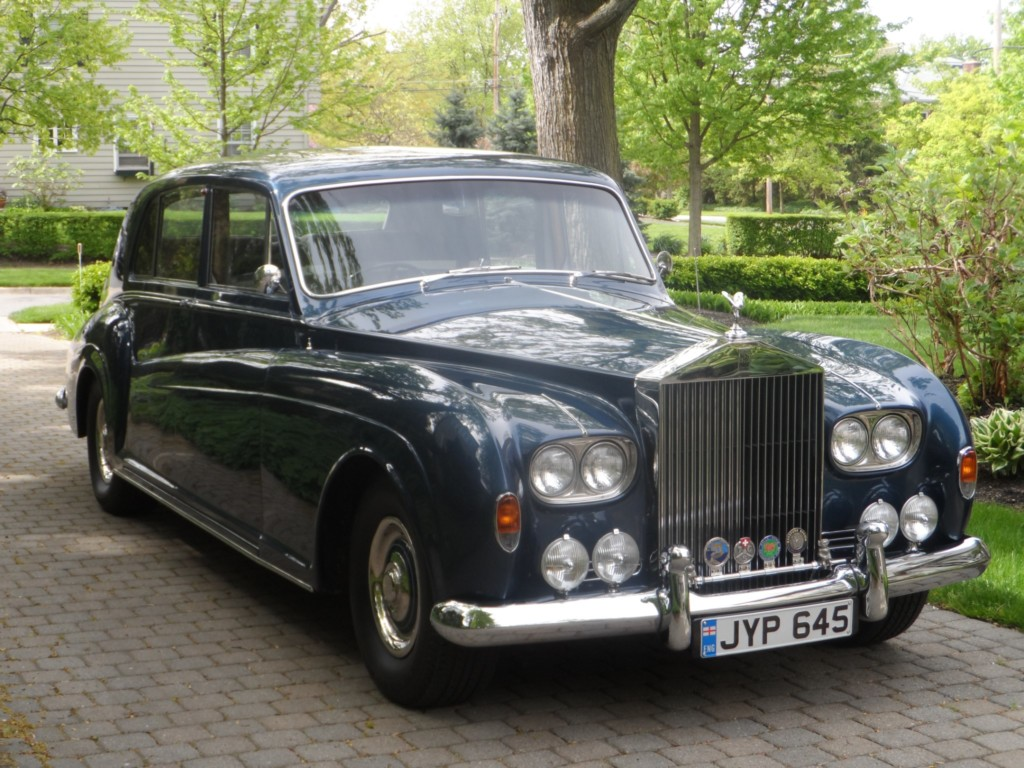

In [5]:
# image source https://bringatrailer.com/listing/1964-rolls-royce-james-young-phanton-v-limosine/
display(Image("images/rolls-royce.jpg", width=350))

We have built up enough tools now that the proof is quite straightforward.

__Proof.__  Let $\{\lambda_i\}$ and $\{\mathbf{v}_i\}$ be the eigenvalues and eigenvectors of $A^TA$, and $\sigma_i = \sqrt{\lambda_i}$.

The starting point is to use the fact that we just proved:

$\{A\mathbf{v}_1, \dots, A\mathbf{v}_r\}$ is an orthogonal basis for $\operatorname{Col}\ A.$

Next, let us normalize each $A\mathbf{v}_i$ to obtain an orthonormal basis $\{\mathbf{u}_1,\dots,\mathbf{u}_r\}$, where

$$ \mathbf{u}_i = \frac{1}{\Vert A\mathbf{v}_i\Vert}A\mathbf{v}_i = \frac{1}{\sigma_i}A\mathbf{v}_i $$

Then

$$ A\mathbf{v}_i = \sigma_i\mathbf{u}_i\;\;\;\;(1 \leq i \leq r)$$

Now the rank of $A$ (which is $r$) may be less than $m$.   

In that case, add additional orthonormal vectors $\{\mathbf{u}_{r+1} \dots \mathbf{u}_m\}$ to the set so that they span $\mathbb{R}^m$.  

Now collect the vectors into matrices.   
    
$$ U = \begin{bmatrix}\mathbf{u}_1&\cdots&\mathbf{u}_m\end{bmatrix}$$

and

$$ V = \begin{bmatrix}\mathbf{v}_1&\cdots&\mathbf{v}_n\end{bmatrix}$$

Recall that these matrices are orthogonal because the $\{\mathbf{v_i}\}$ are orthogonal and the $\{A\mathbf{v_i}\}$  are orthogonal, as we previously proved.

So

$$ AV = [A\mathbf{v}_1\;\cdots\;A\mathbf{v}_r\;\;\overbrace{\mathbf{0}\cdots\mathbf{0}}^{n-r}]$$

$$ = [\sigma_1\mathbf{u}_1\;\cdots\;\sigma_r\mathbf{u}_r\;\mathbf{0}\;\cdots\;\mathbf{0}] = U\Sigma. $$

So 

$$ AV = U\Sigma$$

Now, $V$ is an orthogonal matrix, so multiplying both sides on the right by $V^T$:

$$ U\Sigma V^T = AVV^T = A. $$

## The Swiss Army Knife

We don't have enough time to describe the many applications of the SVD.   

One of its uses is in data mining, where the matrices being analyzed are typically data matrices.

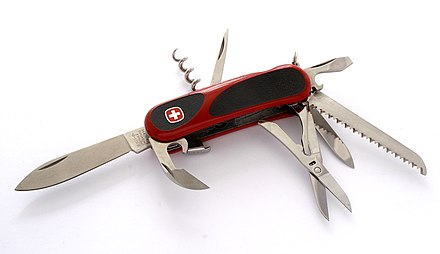

In [6]:
display(Image("images/440px-Wenger_EvoGrip_S17.JPG", width=350))

The approximations we'll discuss are __low-rank__ approximations.

Recall that the rank of a matrix $A$ is the largest number of linearly independent columns of $A$.

Or, equivalently, the dimension of $\operatorname{Col} A$.

Let's define the __rank-$k$ approximation__ to $A$:

When $k < \operatorname{Rank}A$, the rank-$k$ approximation to $A$ is the closest rank-$k$ matrix to $A$, i.e., 

$$A^{(k)} =\arg \min_{\operatorname{Rank}B = k} \Vert A-B\Vert_F.$$

Why is a rank-$k$ approximation valuable?

The reason is that a rank-$k$ matrix may take up __much__ less space than the original $A$.

$m\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{cccc}\begin{array}{c}\vdots\\\vdots\\{\bf a_1}\\\vdots\\\vdots\end{array}&\begin{array}{c}\vdots\\\vdots\\{\bf a_2}\\\vdots\\\vdots\end{array}&\dots&\begin{array}{c}\vdots\\\vdots\\{\bf a_n}\\\vdots\\\vdots\end{array}\\\end{array}\right]}^{\large n} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\sigma_1\mathbf{u}_1&\sigma_k\mathbf{u}_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\mathbf{v}_1&\dots&\dots\\\dots&\dots&\mathbf{v}_k&\dots&\dots\end{array}\right]$

The rank-$k$ approximation takes up space $(m+n)k$ while $A$ itself takes space $mn$.

For example, if $k=10$ and $m = n = 1000$, then the rank-$k$ approximation takes space $20000/1000000 = 2\%$ of $A$.

The key to using the SVD for matrix approximation is as follows:

__The best rank-$k$ approximation to any matrix can be found via the SVD.__

How do we use SVD to find the best rank-$k$ approximation to $A$?

In terms of the singular value decomposition, 

the best rank-$k$ approximation to $A$ is formed by taking 

* $U' =$ the $k$ leftmost columns of $U$, 
* $\Sigma ' =$ the $k\times k$ upper left submatrix of $\Sigma$, and 
* $(V')^T=$ the $k$ upper rows of $V^T$, 

and constructing 

$$A^{(k)} = U'\Sigma'(V')^T.$$

For example, here is a photo.

We can think of this as a $512\times 512$ matrix $A$ whose entries are grayscale values (numbers between 0 and 1).

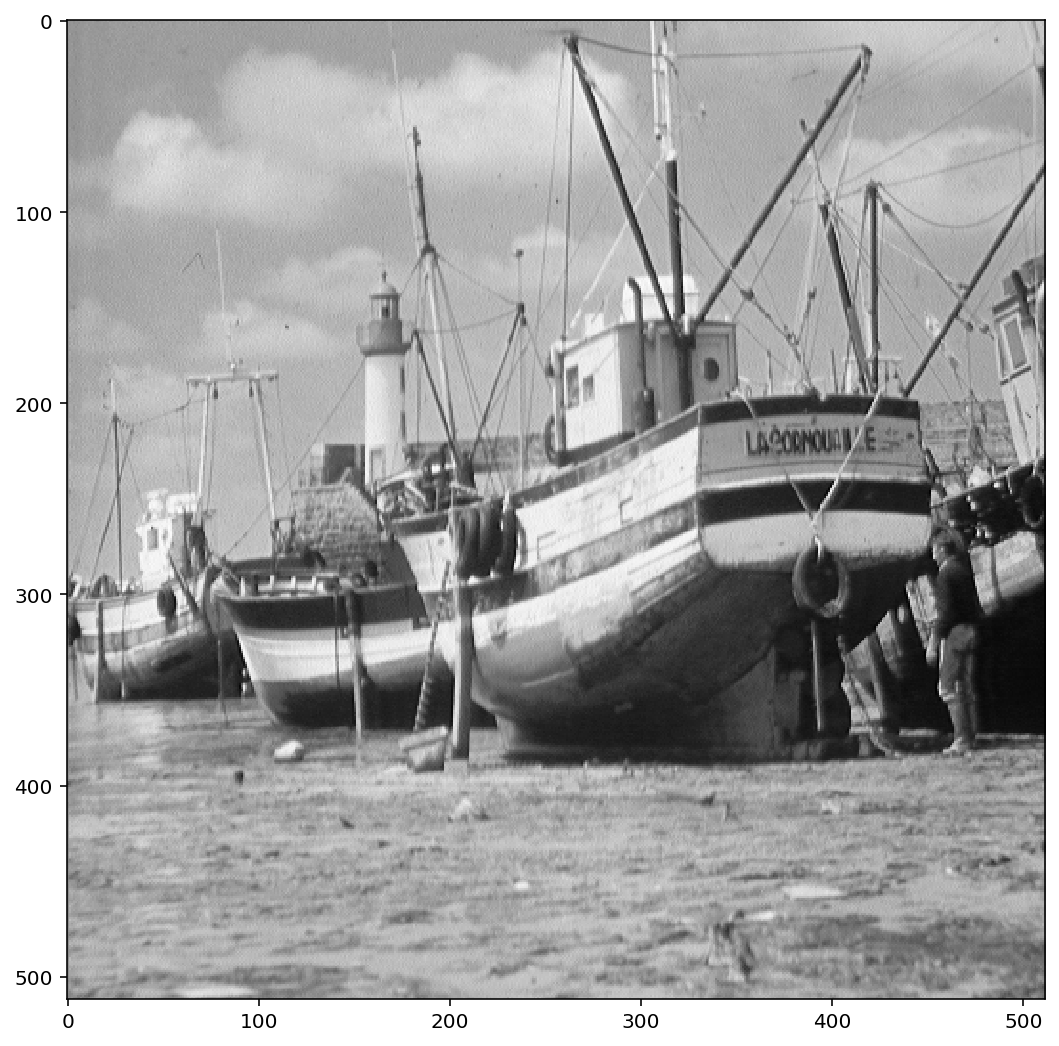

In [19]:
boat = np.loadtxt('data/boat.dat')
import matplotlib.cm as cm
plt.figure(figsize=(9,9))
plt.imshow(boat,cmap = cm.Greys_r);

This matrix $A$ has rank of 512.   

But the error when we approximate $A$ by a rank 40 matrix is only around 10\%.

We say that the __effective__ rank of $A$ is low (perhaps 40).

Let's find the closest rank-40 matrix to $A$ and view it.

We can do this quite easily using the SVD.   

We simply construct our approximation of $A$ using only the first 40 columns of $U$ and top 40 rows of $V^T$.

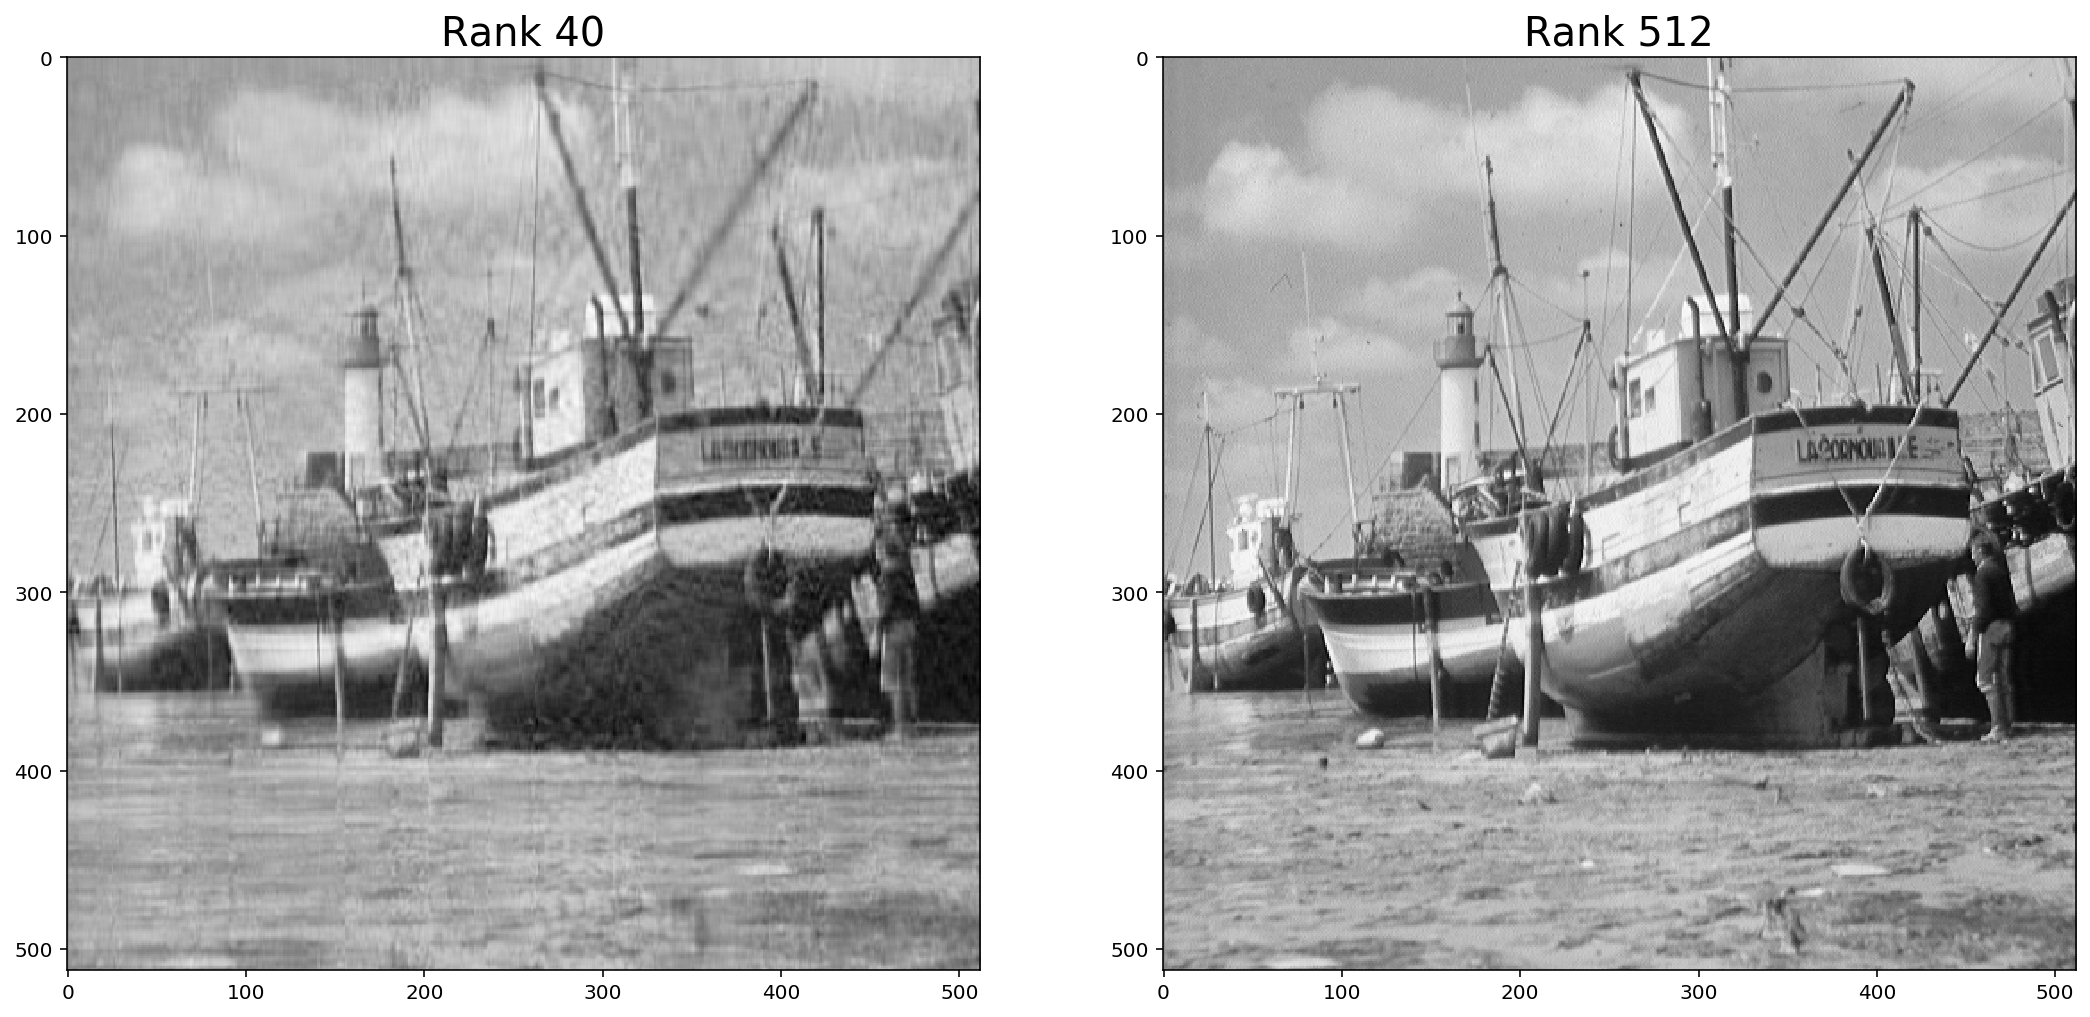

In [23]:
# construct a rank-n version of the boat
u, s, vt = np.linalg.svd(boat, full_matrices=False)
scopy = s.copy()
rank = 40
scopy[rank:] = 0
boatApprox = u @ np.diag(scopy) @ vt
#
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(boatApprox,cmap = cm.Greys_r)
plt.title('Rank {}'.format(rank), size=20)
plt.subplot(1,2,2)
plt.imshow(boat,cmap = cm.Greys_r)
plt.title('Rank 512', size=20);
# plt.subplots_adjust(wspace=0.5);

Note that the rank-40 boat takes up only 40/512 = __8% of the space of the original image!__

This general principle is what makes image, video, and sound compression effective.  

When you 
* watch HDTV, or 
* listen to an MP3, or 
* look at a JPEG image, 

these signals have been compressed using the fact that they are __effectively low-rank__ matrices.

### Wrapup

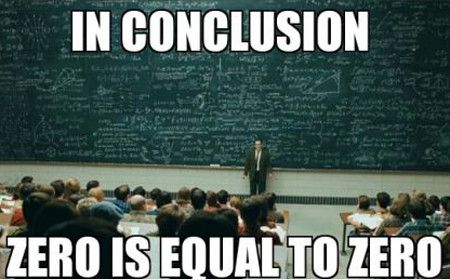

In [5]:
display(Image("images/in-conclusion.jpg", width=550))

We have reached the end!

Of course, this is not really the end ... more like the beginning.

If we had more time, we'd talk about how linear algebra informs the study of graphs, the methods of machine learning, data mining, and many more topics.  

So this is just where we have to stop.

We have looked at the richness of linear algebra from many angles.

We have seen that the simple linear system $A\mathbf{x} = \mathbf{b}$ leads to a whole collection of interesting questions, questions that have unfolded step by step over the course of the semester.

But we have also seen that we can extract the idea of matrix out of a linear system, and consider it as an object in its own right.

Considered on their own, matrices can be seen as linear operators, giving us tools for computer graphics and the solution of dynamical systems and linear equations.

We have also seen that matrices can be seen as data objects, whose linear algebraic properties expose useful facts about the data.

There are many courses you can go on to from here, which will rely on your understanding of linear algebra:

* CS 391 Fundamentals of Data Science
* CS 440 Artificial Intelligence
* CS 470 Computer Systems Performance Analysis
* CS 480 Computer Graphics
* CS 505 Intro to Natural Language Processing
* CS 506 Tools for Data Science
* CS 530 Advanced Algorithms
* CS 531 Advanced Optimization Algorithms
* CS 533 Spectral Methods
* CS 558 Machine Learning
* CS 565 Data Mining
* CS 581 Computational Fabrication
* CS 591 Deep Learning
* CS 591 Compressive Sensing
* CS 591 Natural Language Understanding

In each of these you will use and build on your knowledge of linear algebra.

Enjoy!

Don't forget to submit a course evaluation!